Text(0, 0.5, 'probability')

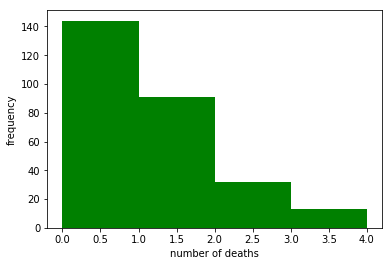

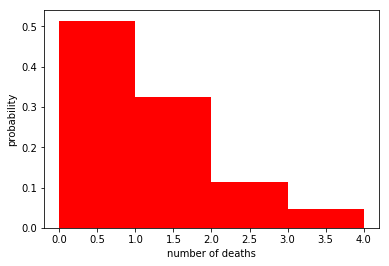

In [4]:
%matplotlib inline
import pystan
import numpy as np
import scipy
import matplotlib.pyplot as plt
# create the model
model = """
data {
    int<lower = 0> N;
    int x[N];
}
parameters{
    real<lower=0, upper=1> lambda;
}
model {
    lambda ~ beta(2, 2);
    x ~ poisson(lambda);
}
"""

# number of deaths by horse or mule kicks in 10 corps of the Prussian army per year, from von Bortkiewicz
von_bort = [0]*144
von_bort.extend([1]*91)
von_bort.extend([2]*32)
von_bort.extend([3]*11)
von_bort.extend([4]*2)

# plot the data
plt.hist(von_bort, 4, facecolor='g')
plt.xlabel('number of deaths')
plt.ylabel('frequency')
plt.figure()
plt.hist(von_bort, 4, facecolor='r', density=True)
plt.xlabel('number of deaths')
plt.ylabel('probability')

In [5]:
# put the data in a dictionary
data = {'N':len(von_bort), 'x': von_bort}

# make the model!
sm = pystan.stan(model_code=model, data=data)

# print the model information
print(sm.stansummary())
sm.plot()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_00eccc9567ed5f4ac88a50dbb5a1950b NOW.
/home/tudor/anaconda3/envs/stan/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /tmp/tmp2qlj5q_d/stanfit4anon_model_00eccc9567ed5f4ac88a50dbb5a1950b_6275790746102766200.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_00eccc9567ed5f4ac88a50dbb5a1950b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda    0.7  1.3e-3   0.05    0.6   0.67    0.7   0.73    0.8   1382    1.0
lp__   -269.5    0.02   0.74 -271.6 -269.7 -269.2 -269.0 -269.0   1729    1.0

Samples were drawn using NUTS at Mon Apr 15 20:02:21 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


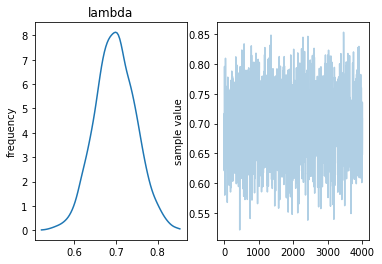

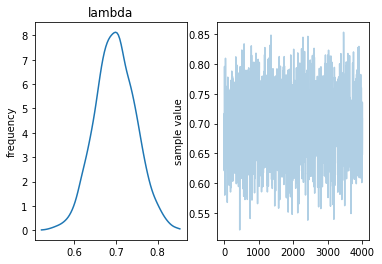

In [9]:
import scipy
sm.plot()